In [2]:
#hierarcical clustering is a algorithm where be build a hierarchy of clusters
#Agglomerative has been used here
#1 Importing the libraries
import pandas as pd
import numpy as np

In [18]:
#2 Importing the covid_india dataset by pandas
df = pd.read_csv(r'C:\Users\DELL\Desktop\dsa project\covid_19_india.csv')
dataset=df.groupby(['State/UnionTerritory']).agg({'Cured':'mean','Deaths':'mean','Confirmed':'mean'})

dataset.size


,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,791.078125,12.953125,992.109375
Andhra Pradesh,112389.616505,1303.854369,144683.936893
Arunachal Pradesh,1233.298913,3.211957,1807.875000
Assam,32840.709677,130.284946,42665.365591
Bihar,39399.836735,241.668367,47596.515306
Cases being reassigned to states,0.000000,0.000000,5759.416667
Chandigarh,1334.366834,25.316583,1964.643216
Chhattisgarh,9567.336683,128.241206,15904.934673
Dadar Nagar Haveli,0.378378,0.000000,5.027027


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Andaman and Nicobar Islands to West Bengal
Data columns (total 3 columns):
Cured        39 non-null float64
Deaths       39 non-null float64
Confirmed    39 non-null float64
dtypes: float64(3)
memory usage: 1.2+ KB


In [1]:
# extract the measurements as a NumPy array
samples = dataset.iloc[:, [0,1, 2]].values
samples.shape

NameError: name 'dataset' is not defined

In [7]:
names=  ['Andaman and Nicobar Islands',
'Andhra Pradesh',
'Arunachal Pradesh',
'Assam',
'Bihar',
'Cases being reassigned to states',
'Chandigarh',
'Chhattisgarh',
'Dadar Nagar Haveli',
'Dadra and Nagar Haveli and Daman and Diu',	
'Daman & Diu',
'Delhi',
'Goa',
'Gujarat',
'Haryana',
'Himachal Pradesh',
'Jammu and Kashmir',
'Jharkhand',
'Karnataka',
'Kerala',
'Ladakh',
'Madhya Pradesh',
'Maharashtra',
'Manipur',
'Meghalaya',
'Mizoram',
'Nagaland',
'Odisha',
'Puducherry',
'Punjab',
'Rajasthan',
'Sikkim',
'Tamil Nadu',
'Telangana',
'Tripura',
'Unassigned',
'Uttar Pradesh',
'Uttarakhand',
'West Bengal']



In [8]:
#Using the dendrogram to find the optimal numbers of clusters. 
#First thing we're going to do is to import scipy library. scipy is 
#an open source Python library that contains tools to do
#hierarchical clustering and building dendrograms. Only import the needed tool.

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')

In [10]:
mergings = linkage(samples, method='ward')

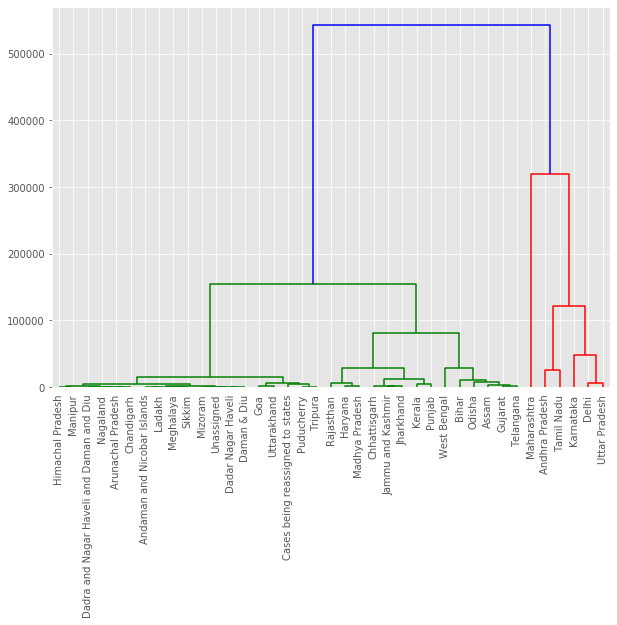

In [11]:
dendrogram(mergings,
           labels=names,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

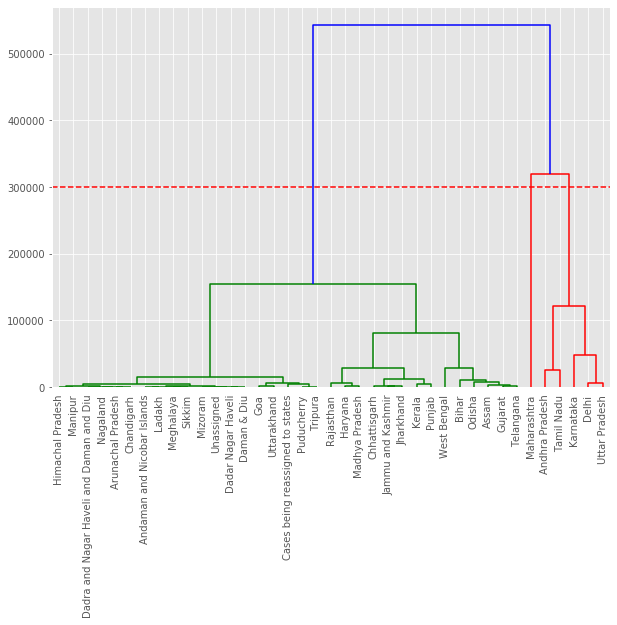

In [12]:
dendrogram(mergings,
           labels=names,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.axhline(y=300000, color='r', linestyle='--')

In [13]:
##HIERARCHICAL CLUSTERING
# Fitting Hierarchical Clustering to the data, it tells which cluster each data belongs to
#ward's method - sum of squared Euclidean distance is minimized.


from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(samples)

In [14]:
y_hc.shape

(39,)

In [15]:
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [16]:
dataset['labels']=y_hc
dataset.head(n=39)

,Cured,Deaths,Confirmed,labels
State/UnionTerritory,,,,
Andaman and Nicobar Islands,791.078125,12.953125,992.109375,0
Andhra Pradesh,112389.616505,1303.854369,144683.936893,1
Arunachal Pradesh,1233.298913,3.211957,1807.875000,0
Assam,32840.709677,130.284946,42665.365591,0
Bihar,39399.836735,241.668367,47596.515306,0
Cases being reassigned to states,0.000000,0.000000,5759.416667,0
Chandigarh,1334.366834,25.316583,1964.643216,0
Chhattisgarh,9567.336683,128.241206,15904.934673,0
Dadar Nagar Haveli,0.378378,0.000000,5.027027,0


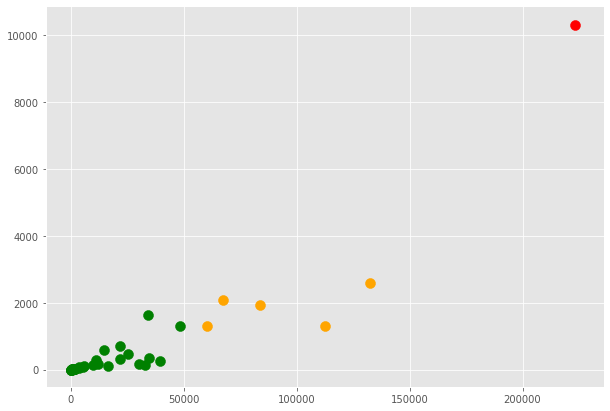

In [17]:
#visualize how it looks like 
plt.scatter(samples[y_hc== 0,0], samples[y_hc==0,1],s=100,c='green')
plt.scatter(samples[y_hc== 1,0], samples[y_hc==1,1],s=100,c='orange')
plt.scatter(samples[y_hc== 2,0], samples[y_hc==2,1],s=100,c='red')

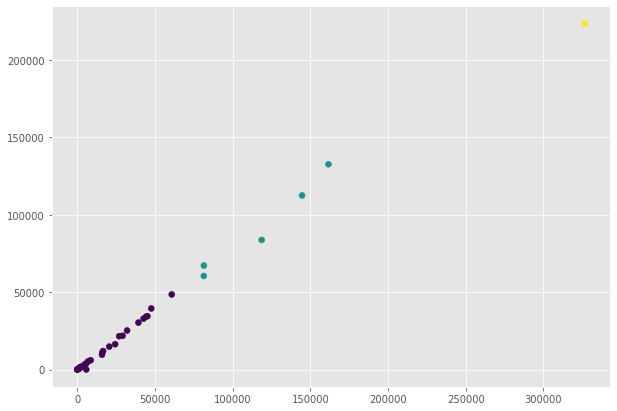

In [121]:
plt.figure(figsize=(10, 7))  
plt.scatter(dataset['Confirmed'], dataset['Cured'], c=hc.labels_)

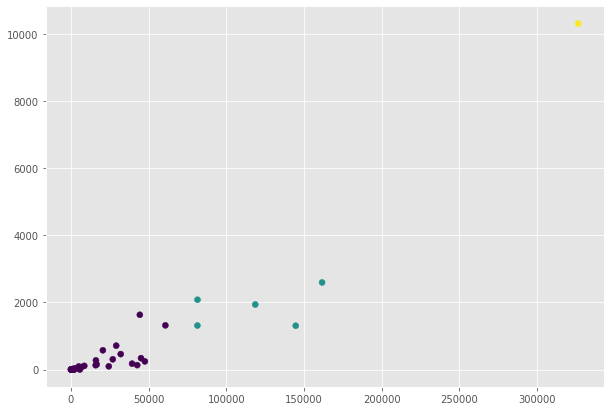

In [122]:
plt.figure(figsize=(10, 7))  
plt.scatter(dataset['Confirmed'], dataset['Deaths'], c=hc.labels_) 

In [123]:
#making four clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(samples)

In [124]:
y_hc

array([3, 0, 3, 1, 1, 3, 3, 1, 3, 3, 3, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 1,
       2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 0, 1, 3, 3, 0, 3, 1], dtype=int64)

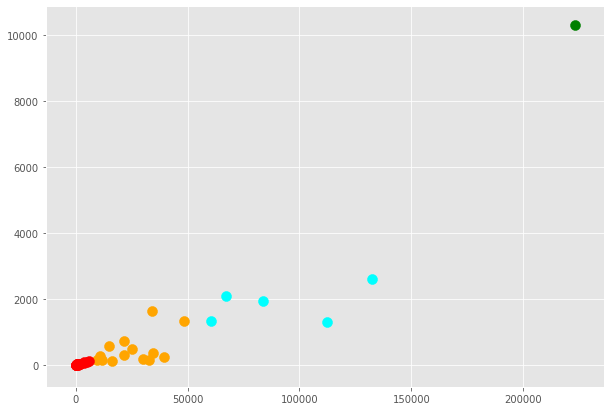

In [125]:
#visualize how it looks like 
plt.scatter(samples[y_hc== 0,0], samples[y_hc==0,1],s=100,c='cyan')
plt.scatter(samples[y_hc== 1,0], samples[y_hc==1,1],s=100,c='orange')
plt.scatter(samples[y_hc== 2,0], samples[y_hc==2,1],s=100,c='green')
plt.scatter(samples[y_hc== 3,0], samples[y_hc==3,1],s=100,c='red')